In [163]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import numpy as np
import scipy.stats as st
from pprint import pprint
from config import api_key
from config import gkey
from citipy import citipy
from datetime import datetime

In [164]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

# Perform API Calls

In [165]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

latitudes = []
longitudes = []
temp = []
humidity = []
clouds = []
city_list = []
date = []
country = []
wind = []

# Set base URL and other perams
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
unit = '&units=Imperial'

record = 1
set = 1

# Loop through list of cities
for city in cities:

    # Build query URL
    query_url = base_url + city + unit + '&appid=' + api_key

    # If the URL doesn't exist, it will skip
    try:
    
    # Make request using query URL
        response = requests.get(query_url).json()
        
        # If the info cannot be found, program will skip
        try:
            
            # Navigate json and save weather/city info into lists for each city
            city_list.append(response['name'])
            latitudes.append(response['coord']['lat'])
            longitudes.append(response['coord']['lat'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])

            print(f"Processing Record {record} of Set {set} | {city}")

        except KeyError:
            print(f"Info not found. Skipping...")

    except KeyError:
        print(f"City {city} not found. Skipping...")

    # When the loop reaches the API limit, the program sleeps and resets    
    record += 1
    if record == 21:
        time.sleep(1)
        record == 0 
        set += 1


Processing Record 1 of Set 1 | vaini
Info not found. Skipping...
Processing Record 3 of Set 1 | nouakchott
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | fairbanks
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | sakakah
Processing Record 14 of Set 1 | san juan
Info not found. Skipping...
Processing Record 16 of Set 1 | half moon bay
Info not found. Skipping...
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | south lyon
Processing Record 20 of Set 1 | locri
Processing Record 21 of Set 2 | hobart
Processing Record 22 of Set 2 | hagi
Info not found. Skipping...
Processing Record 24 of Set 2 | punta arenas
Processing Record 25 of Set 2 | rikitea
Processing Record 26 of 

Processing Record 203 of Set 2 | diapaga
Processing Record 204 of Set 2 | ahipara
Info not found. Skipping...
Processing Record 206 of Set 2 | inhambane
Processing Record 207 of Set 2 | port hedland
Processing Record 208 of Set 2 | tabou
Info not found. Skipping...
Processing Record 210 of Set 2 | srednekolymsk
Processing Record 211 of Set 2 | lulea
Processing Record 212 of Set 2 | avera
Processing Record 213 of Set 2 | pangkalanbuun
Processing Record 214 of Set 2 | san patricio
Processing Record 215 of Set 2 | carutapera
Processing Record 216 of Set 2 | mahebourg
Processing Record 217 of Set 2 | harper
Processing Record 218 of Set 2 | fengcheng
Processing Record 219 of Set 2 | budelsdorf
Processing Record 220 of Set 2 | la palma
Processing Record 221 of Set 2 | ordynskoye
Processing Record 222 of Set 2 | kokkola
Processing Record 223 of Set 2 | shugurovo
Processing Record 224 of Set 2 | bubaque
Processing Record 225 of Set 2 | nyurba
Processing Record 226 of Set 2 | saint george
Proce

Processing Record 405 of Set 2 | mutoko
Processing Record 406 of Set 2 | vestmannaeyjar
Processing Record 407 of Set 2 | panguna
Processing Record 408 of Set 2 | doha
Processing Record 409 of Set 2 | kapustin yar
Processing Record 410 of Set 2 | montrose
Processing Record 411 of Set 2 | dhidhdhoo
Processing Record 412 of Set 2 | ulladulla
Processing Record 413 of Set 2 | susangerd
Processing Record 414 of Set 2 | salamiyah
Processing Record 415 of Set 2 | lerwick
Processing Record 416 of Set 2 | villarrica
Processing Record 417 of Set 2 | rumonge
Processing Record 418 of Set 2 | indiaroba
Processing Record 419 of Set 2 | san ignacio
Processing Record 420 of Set 2 | mokrousovo
Processing Record 421 of Set 2 | sao raimundo nonato
Processing Record 422 of Set 2 | meulaboh
Processing Record 423 of Set 2 | rubtsovsk
Processing Record 424 of Set 2 | sao joao dos patos
Processing Record 425 of Set 2 | bridlington
Processing Record 426 of Set 2 | roald
Info not found. Skipping...
Processing Re

Processing Record 603 of Set 2 | jos
Info not found. Skipping...
Processing Record 605 of Set 2 | marco
Processing Record 606 of Set 2 | kenai
Processing Record 607 of Set 2 | warrington
Processing Record 608 of Set 2 | horta
Processing Record 609 of Set 2 | derbent
Processing Record 610 of Set 2 | yurgamysh
Processing Record 611 of Set 2 | nantucket


In [169]:
data = {'City' : city_list, 'Country' : country, 
        'Lat' : latitudes, 'Lng' : longitudes,
        'Max Temp' : temp, 'Humidity' : humidity, 
        'Cloudiness' : clouds, 'Wind Speed' : wind}

weather_df = pd.DataFrame(data)

weather_df.to_csv('Output_Data/Weather_Data.csv')

weather_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,-21.20,-21.20,77.00,94,75,2.24
1,Nouakchott,MR,18.09,18.09,80.60,30,0,10.29
2,New Norfolk,AU,-42.78,-42.78,55.40,76,42,9.17
3,Fairbanks,US,64.84,64.84,-16.01,74,1,2.86
4,Lagoa,PT,39.05,39.05,56.79,77,90,15.75


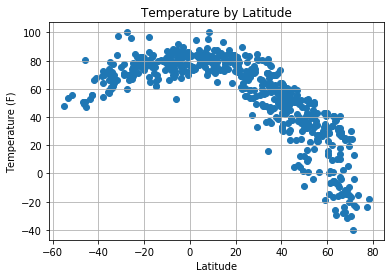

In [171]:
plt.scatter(latitudes, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature by Latitude')
plt.grid(True)
plt.savefig('Output_Data/lat_temp.png')

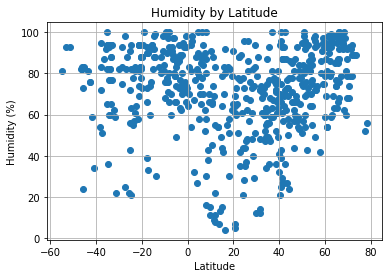

In [172]:
plt.scatter(latitudes, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Latitude')
plt.grid(True)
plt.savefig('Output_Data/lat_humidity.png')

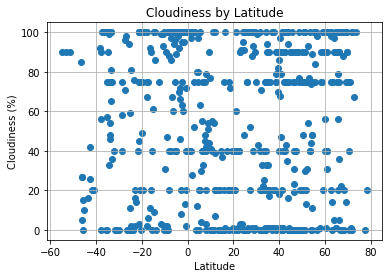

In [173]:
plt.scatter(latitudes, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness by Latitude')
plt.grid(True)
plt.savefig('Output_Data/lat_cloud.png')

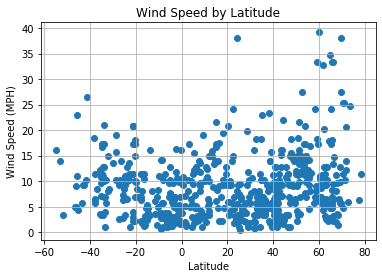

In [174]:
plt.scatter(latitudes, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed by Latitude')
plt.grid(True)
plt.savefig('Output_Data/wind.png')

# Linear Regression

Create Northern and Southern Hemisphere DataFrames

In [175]:
# A function to create linear regression plots
def regress(x, y, hemisphere):
    hem = []
    i = []
    
    # Checks for hemisphere argument ('n' or 's')
    if hemisphere == 'n':
        
        # For every latitude, check if greater than or equal to 0
        for lat in x:
            if lat >= 0:
                
                # Adds values to lists if meets requirement
                hem.append(lat)
                i.append(y[x.index(lat)]) 
                
        coords = (0,10)
    
    # Same, but for the Southern Hemisphere
    if hemisphere == 's':
        for lat in x:
            if lat <= 0:
                hem.append(lat)
                i.append(y[x.index(lat)])

        coords = (-50,20)

                
    # Calculates linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(hem,i)
    hem = np.asarray(hem, dtype=np.float64)
    regress_values = hem * slope + intercept

    # Plots scatter plot and regresion
    plt.scatter(hem,i)
    plt.plot(hem,regress_values,"r-")

    # Annotates graph with equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    
    # Prints r squared value from linregress function
    print(f'The r-squared is: {rvalue}')

The r-squared is: -0.859900936873129


Text(0.5, 1.0, 'Temp in the Northern Hemisphere')

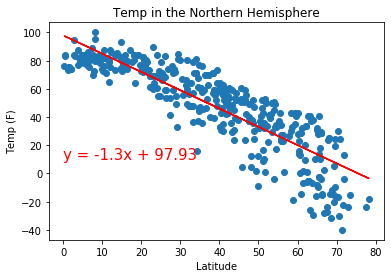

In [176]:
regress(latitudes,temp,'n')
plt.ylabel('Temp (F)')
plt.title('Temp in the Northern Hemisphere')

The r-squared is: 0.6010985766355135


Text(0.5, 1.0, 'Temp in the Southern Hemisphere')

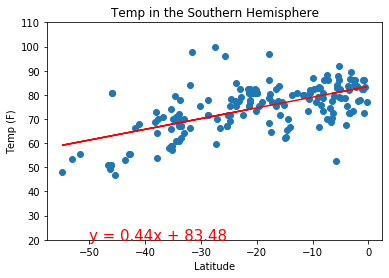

In [177]:
regress(latitudes,temp,'s')
plt.ylim(20,110)
plt.ylabel('Temp (F)')
plt.title('Temp in the Southern Hemisphere')

The r-squared is: 0.3377727821476555


Text(0.5, 1.0, 'Humidity in the Northern Hemisphere')

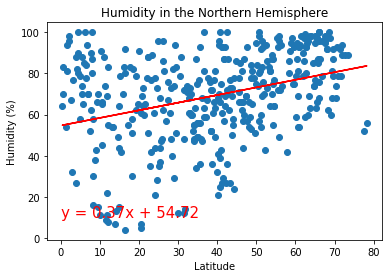

In [178]:
regress(latitudes, humidity, 'n')
plt.ylabel('Humidity (%)')
plt.title('Humidity in the Northern Hemisphere')

The r-squared is: 0.13357951413656802


Text(0.5, 1.0, 'Humidity in the Southern Hemisphere')

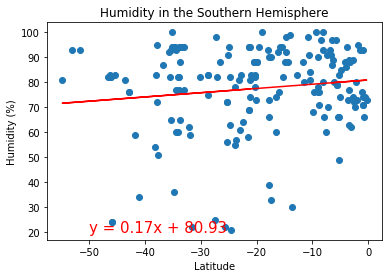

In [179]:
regress(latitudes, humidity, 's')
plt.ylabel('Humidity (%)')
plt.title('Humidity in the Southern Hemisphere')

The r-squared is: 0.20005174942052414


Text(0.5, 1.0, 'Clouldines in the Northern Hemisphere')

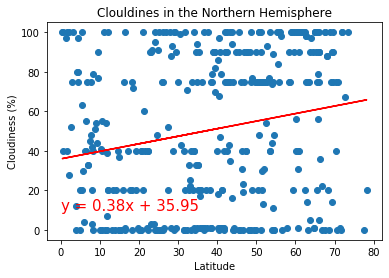

In [180]:
regress(latitudes, clouds , 'n')
plt.ylabel('Cloudiness (%)')
plt.title('Clouldines in the Northern Hemisphere')

The r-squared is: 0.1433446266587275


Text(0.5, 1.0, 'Cloudiness in the Southern Hemisphere')

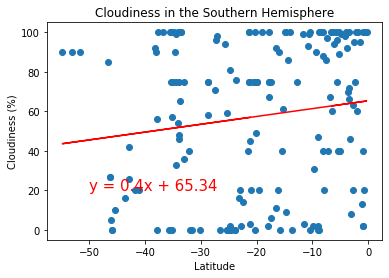

In [181]:
regress(latitudes, clouds , 's')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness in the Southern Hemisphere')

The r-squared is: 0.23892956000878202


Text(0.5, 1.0, 'Wind speed in the Northern Hemisphere')

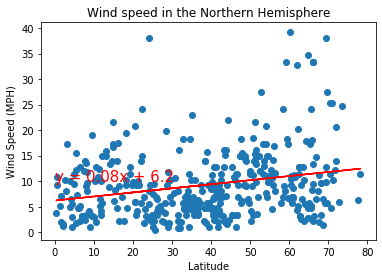

In [182]:
regress(latitudes, wind ,'n')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind speed in the Northern Hemisphere')

The r-squared is: -0.3468895920466314


Text(0.5, 1.0, 'Wind speed in the Southern Hemisphere')

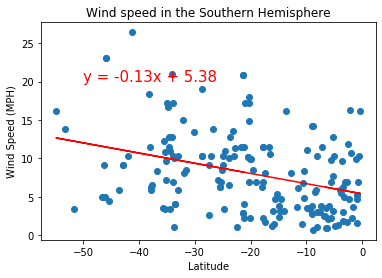

In [183]:
regress(latitudes, wind ,'s')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind speed in the Southern Hemisphere')